<a href="https://colab.research.google.com/github/MahSrb/API/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from tensorflow import keras
from tensorflow import nn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import keras.backend as K
import pickle 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
url='https://drive.google.com/file/d/1TkdipCKlDRPJGzVcavRnMYdjWOK9ev31/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
dataset = pd.read_csv(url)
print(dataset)

                                                Sentence  Label   LP  NSPA  \
0                      " or pg_sleep  (  __TIME__  )  --      1   33     6   
1       AND 1  =  utl_inaddr.get_host_address   (    ...      1  218    35   
2       select * from users where id  =  '1' or @ @1 ...      1   90    20   
3       select * from users where id  =  1 or 1#"  ( ...      1   85    18   
4       select name from syscolumns where id   =     ...      1  109    18   
...                                                  ...    ...  ...   ...   
30603              DELETE FROM door WHERE grow = 'small'      0   37     6   
30604                               DELETE FROM tomorrow      0   20     2   
30605                       SELECT wide ( s )  FROM west      0   28     6   
30606       SELECT * FROM  ( SELECT slide FROM breath )       0   44     9   
30607                           SELECT TOP 3 * FROM race      0   24     5   

           RSPA  NSPE      RSPE  NK  KWS       ROC  
0      0.1

In [ ]:
dataset.describe()

,Label,LP,NSPA,RSPA,NSPE,RSPE,NK,KWS,ROC
count,30608.000000,30608.000000,30608.000000,30608.000000,30608.000000,30608.000000,30608.000000,30608.000000,30608.000000
mean,0.370491,69.192172,11.630325,0.132785,4.590271,0.045622,2.163454,4.922112,0.821594
std,0.482944,81.412788,15.027395,0.076805,8.181164,0.044216,1.902114,4.788855,0.108364
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,2.000000,0.090000,0.000000,0.000000,0.000000,0.000000,0.742815
50%,0.000000,48.000000,8.000000,0.162602,2.000000,0.042553,2.000000,4.000000,0.793103
75%,1.000000,81.000000,14.000000,0.187500,5.000000,0.072727,3.000000,8.000000,0.896104
max,1.000000,5370.000000,215.000000,0.666667,358.000000,1.000000,16.000000,49.000000,1.000000


In [ ]:
X = dataset.iloc [0:30600,2:10]
Y = dataset.iloc [0:30600,1]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(24480, 8) (6120, 8) (24480,) (6120,)


In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=0)
cvscores = []
for train, test in kfold.split(X, Y):
  model = Sequential()
  model.add(Dense(8, input_dim=8, activation='relu'))
  model.add(Dense(100, activation='relu'))
  model.add(Dense(100, activation='relu'))
  model.add(Dense(100, activation='relu'))
  model.add(Dense(100, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  optimizer = keras.optimizers.Adam(learning_rate=0.05)
  model.compile(loss='binary_crossentropy', optimizer = optimizer , metrics=['accuracy'])
  trmodel=model.fit(X_train, y_train, epochs=50, batch_size=1000, verbose=0)
  scores = model.evaluate(X_train, y_train, verbose=1)
  print("Learning_rate:" + str(K.eval(model.optimizer.lr)))
  print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  cvscores.append(scores[1] * 100) 
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

765/765 [==============================] - 2s 3ms/step - loss: 0.1856 - accuracy: 0.9385
Learning_rate:0.05
accuracy: 93.85%
765/765 [==============================] - 2s 3ms/step - loss: 0.1459 - accuracy: 0.9516
Learning_rate:0.05
accuracy: 95.16%
765/765 [==============================] - 2s 2ms/step - loss: 0.2735 - accuracy: 0.8885
Learning_rate:0.05
accuracy: 88.85%
765/765 [==============================] - 2s 2ms/step - loss: 0.2885 - accuracy: 0.8869
Learning_rate:0.05
accuracy: 88.69%
765/765 [==============================] - 2s 2ms/step - loss: 0.1428 - accuracy: 0.9548
Learning_rate:0.05
accuracy: 95.48%
765/765 [==============================] - 3s 3ms/step - loss: 0.1556 - accuracy: 0.9491
Learning_rate:0.05
accuracy: 94.91%
765/765 [==============================] - 1s 2ms/step - loss: 0.1393 - accuracy: 0.9548
Learning_rate:0.05
accuracy: 95.48%
765/765 [==============================] - 1s 2ms/step - loss: 0.2175 - accuracy: 0.9311
Learning_rate:0.05
accuracy: 93.11%


In [ ]:
pre = model.predict(X_test)
rounded = [round(x1[0]) for x1 in pre]
print(rounded)
eval = model.evaluate(X_test,y_test)
cf_matrix = confusion_matrix(y_test, rounded)
print(cf_matrix)

[0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 

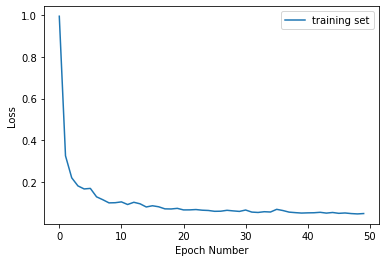

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(trmodel.history['loss'], label='training set')
plt.legend()

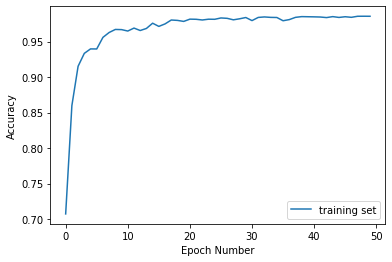

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(trmodel.history['accuracy'], label='training set')
plt.legend()

In [ ]:
print(trmodel.history)

{'loss': [0.9939510822296143, 0.3256112337112427, 0.2204415649175644, 0.18168576061725616, 0.16710634529590607, 0.16970866918563843, 0.12929955124855042, 0.11558985710144043, 0.10041175782680511, 0.10117591172456741, 0.10513733327388763, 0.09261956065893173, 0.10325603932142258, 0.0959988534450531, 0.08082117885351181, 0.08659424632787704, 0.08170098066329956, 0.07177701592445374, 0.07118126004934311, 0.07416968792676926, 0.06668146699666977, 0.06687384843826294, 0.06844833493232727, 0.06537263840436935, 0.064047671854496, 0.06002803519368172, 0.06050132215023041, 0.06487148255109787, 0.06198845058679581, 0.059558916836977005, 0.06616644561290741, 0.05625557899475098, 0.054530829191207886, 0.05806942284107208, 0.05663708597421646, 0.06948311626911163, 0.06373156607151031, 0.05609889701008797, 0.05365047603845596, 0.051631901413202286, 0.05262381210923195, 0.05310600623488426, 0.05524512752890587, 0.051400281488895416, 0.05438438430428505, 0.050336167216300964, 0.05204983428120613, 0.04

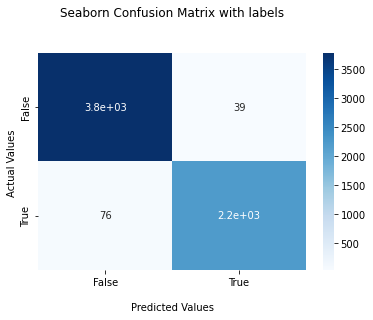

In [ ]:
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [ ]:
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 8)                 72        
                                                                 
 dense_46 (Dense)            (None, 100)               900       
                                                                 
 dense_47 (Dense)            (None, 100)               10100     
                                                                 
 dense_48 (Dense)            (None, 100)               10100     
                                                                 
 dense_49 (Dense)            (None, 1)                 101       
                                                                 
Total params: 21,273
Trainable params: 21,273
Non-trainable params: 0
_________________________________________________________________
None


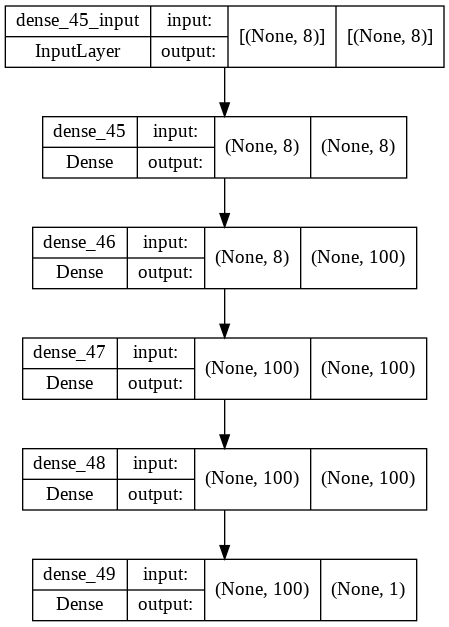

In [ ]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

In [ ]:
import pathlib
BASE_DIR = pathlib.Path().resolve().parent
EXPORT_DIR = BASE_DIR / "exports"
EXPORT_DIR.mkdir(exist_ok=True, parents=True)
MODEL_EXPORT_PATH = EXPORT_DIR / "model.h5"
FEATURES_EXPORT_PATH = EXPORT_DIR / "features.pkl"

In [ ]:
features = list(X_train.columns)
with open (FEATURES_EXPORT_PATH, 'wb') as f: 
  pickle.dump(features, f)

In [ ]:
model.save(str(MODEL_EXPORT_PATH))

In [ ]:
MODEL_EXPORT_PATH = EXPORT_DIR / "model.pkl"
with open (MODEL_EXPORT_PATH, 'wb') as f: 
  pickle.dump(model, f)

In [ ]:
pickled_model = pickle.load(open(EXPORT_DIR / "model.pkl", 'rb'))
pickled_model.predict(X_test)

array([[0.21664146],
       [1.        ],
       [0.00426298],
       ...,
       [0.00186139],
       [0.04085925],
       [0.00262722]], dtype=float32)

In [ ]:
def predict(LP, NSPA, RSPA, NSPE, RSPE, NK, KWS, ROC, ):
  X_input = list[LP, NSPA, RSPA, NSPE, RSPE, NK, KWS, ROC]
  X_output = model.predict(X_input)
  labled_pred = [{f"{lables_legend_invertor[str(i)]}" : x} for i, x in enumerate (X_output)]
  return labled_pred